## Polynomial regression - overfitting and underfitting

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(42)
samples = 100 
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + 0.5*x + 3 
y = f(X) + np.random.randn(samples,1) # adds an epsilon standard normally distributed

f(X).shape, X.shape

((100, 1), (100, 1))

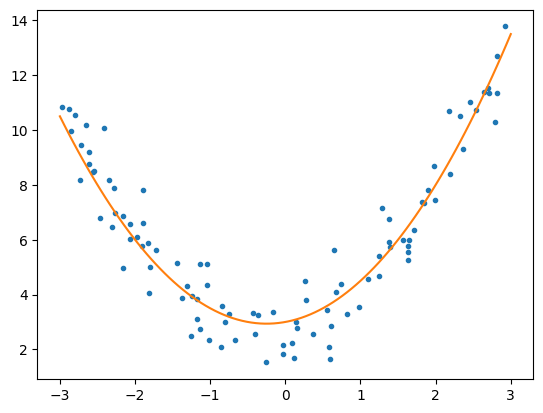

In [3]:
x = np.linspace(-3,3,100).reshape(100,1)

plt.plot(X, y, '.')
plt.plot(x, f(x))

<Axes: title={'center': 'y = x^2+0.5x+3+\\epsilon$'}, xlabel='x', ylabel='y'>

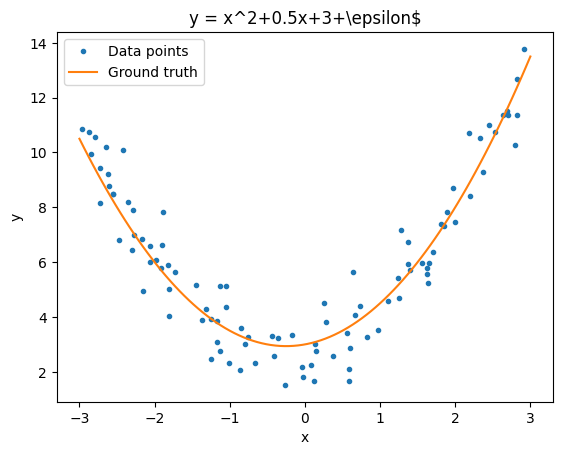

In [4]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, '.', label = "Data points")
    x = np.linspace(-3,3, samples).reshape(-1,1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title = r"y = x^2+0.5x+3+\epsilon$", xlabel='x', ylabel="y")
    ax.legend()
    return ax

draw_data()

Polynomial regression

### feature engineering

- constructed feature artificially

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False)# TODO : check why i chose not to include bias

polynomial_features = polynomial_instance.fit_transform(X)
polynomial_features

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [6]:
polynomial_features.shape

(100, 2)

In [7]:
polynomial_features[:3], X[:3] # second row is a squared value of the first

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365]]))

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y) # trained the model
model.coef_ # beta_1, beta_2

array([[0.43366893, 1.06456263]])

In [9]:
x = np.linspace(-3,3, samples).reshape(-1,1) # train data exaple
x.shape

(100, 1)

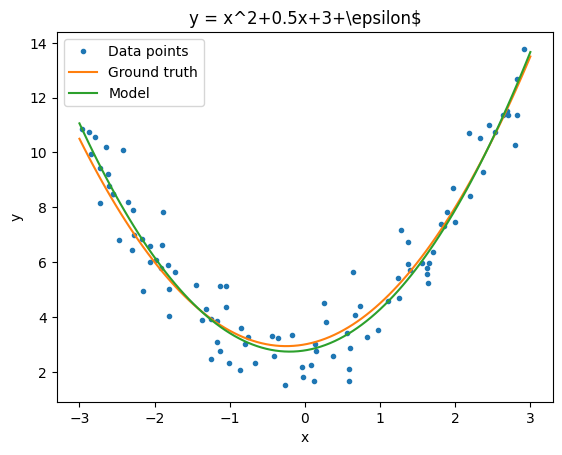

In [10]:
x_polynomial_features = polynomial_instance.transform(x)
y_pred = model.predict(x_polynomial_features) #predict every x value in x

ax = draw_data()
ax.plot(x, y_pred, label="Model")
ax.legend()

## Underfitting

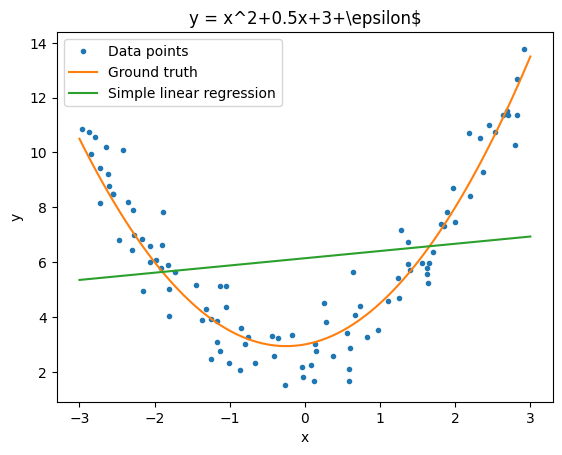

In [13]:
model = LinearRegression()
model.fit(X,y)


y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label="Simple linear regression")
ax.legend();

## Overfitting

x_features.shape=(100, 50)


[Text(0.5, 1.0, 'Overfitted, the model is too complex'), (-5.0, 15.0)]

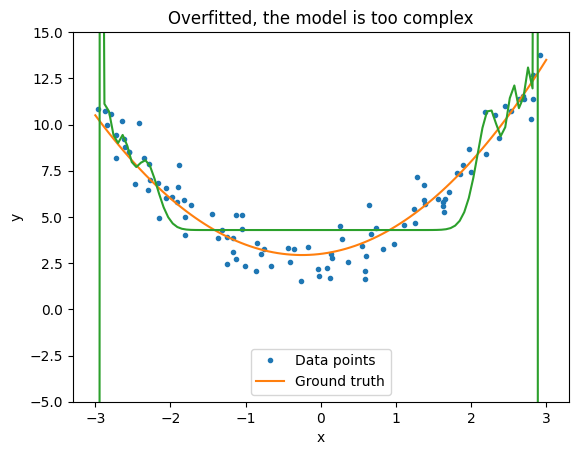

In [24]:
polynomial_instances = PolynomialFeatures(50, include_bias=False)
x_features = polynomial_instances.fit_transform(X)

print(f"{x_features.shape=}")

model = LinearRegression()
model.fit(x_features, y)

x_polynomial_features = polynomial_instances.transform(x)
y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(title="Overfitted, the model is too complex",ylim = [-5, 15])
# cant generalise well

## Choose a model

In [26]:
np.random.seed(42)
samples = 10000

X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**4 + x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples, 1)

X.shape, y.shape

((10000, 1), (10000, 1))

## Train|val|test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Elbow

In [32]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train) # feature engineering on train data
    val_features = model_poly.fit_transform(X_val) # feature engineering on validation data / also doesnt matter if we do fit_transform or just transform
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

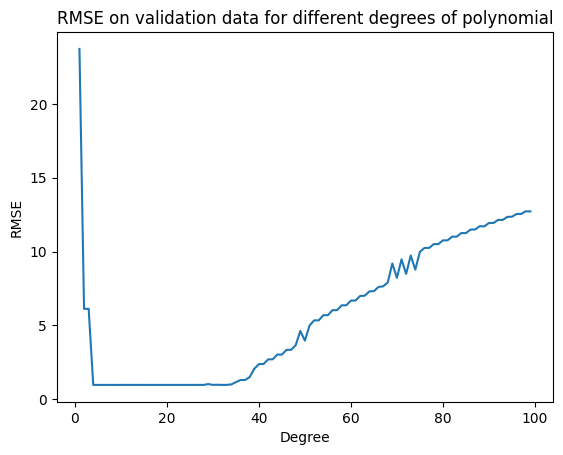

In [35]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

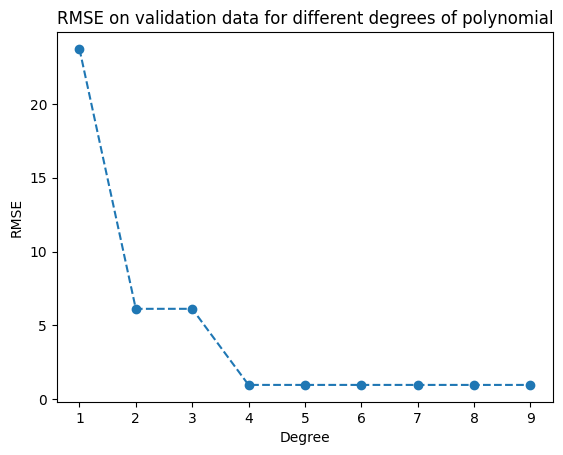

In [38]:
plt.plot(range(1,10), RMSE_val[:9], "o--")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")